In [1]:
import pandas as pd

df = pd.read_csv("data/raw/energy_data.csv")
df.head()


,timestamp,fridge,ac,lights,microwave,total_power
0,2023-01-01 00:00:00,128,0,80,907,1115
1,2023-01-01 01:00:00,52,0,35,0,87
2,2023-01-01 02:00:00,105,0,52,0,157
3,2023-01-01 03:00:00,153,0,0,0,153
4,2023-01-01 04:00:00,113,0,62,0,175


In [2]:
import pandas as pd

df = pd.read_csv("data/raw/energy_data.csv")
df.tail()


,timestamp,fridge,ac,lights,microwave,total_power
4339,2023-06-30 19:00:00,98,2152,64,921,3235
4340,2023-06-30 20:00:00,0,2377,50,0,2427
4341,2023-06-30 21:00:00,185,1371,26,0,1582
4342,2023-06-30 22:00:00,51,2188,90,0,2329
4343,2023-06-30 23:00:00,0,0,70,0,70


In [3]:
df.isnull().sum()

timestamp      0
fridge         0
ac             0
lights         0
microwave      0
total_power    0
dtype: int64

In [4]:
df.isnull().sum().sum()

np.int64(0)

In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4339    False
4340    False
4341    False
4342    False
4343    False
Length: 4344, dtype: bool

In [6]:
df.duplicated().sum()

np.int64(0)

<Axes: >

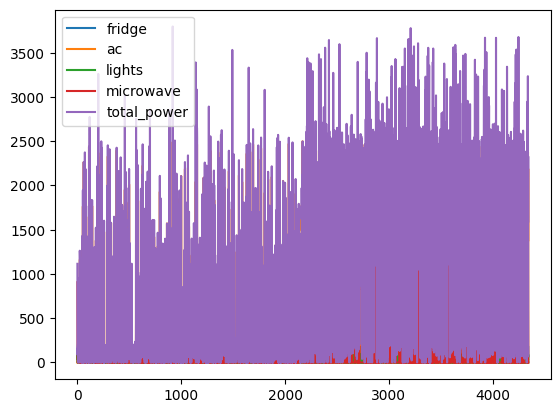

In [7]:
df.plot()

array([[<Axes: title={'center': 'fridge'}>,
        <Axes: title={'center': 'ac'}>],
       [<Axes: title={'center': 'lights'}>,
        <Axes: title={'center': 'microwave'}>],
       [<Axes: title={'center': 'total_power'}>, <Axes: >]], dtype=object)

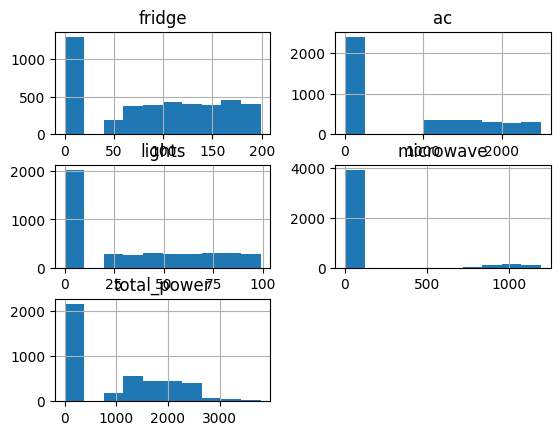

In [8]:
df.hist()

<Axes: title={'center': 'Total Power Over Time'}>

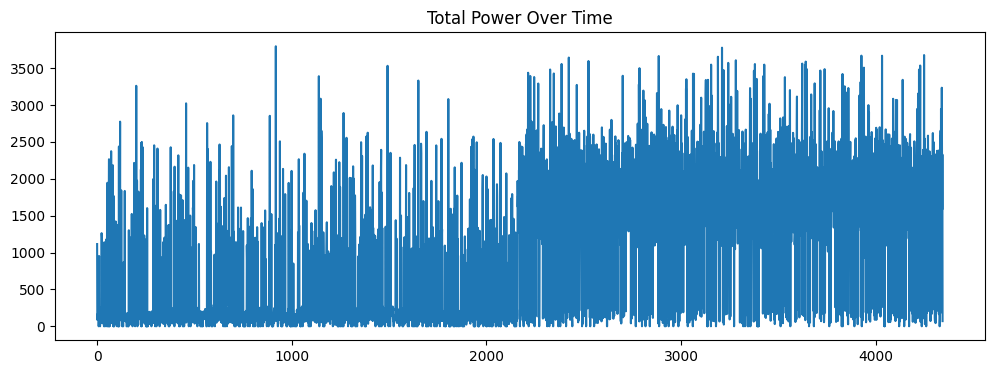

In [9]:
df['total_power'].plot(figsize=(12,4), title="Total Power Over Time")


In [10]:
df['hour'] = df.index.hour

df.groupby('hour')['total_power'].mean().plot(
    kind='bar', title="Average Power by Hour"
)


AttributeError: 'RangeIndex' object has no attribute 'hour'

In [11]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   timestamp    4344 non-null   str  
 1   fridge       4344 non-null   int64
 2   ac           4344 non-null   int64
 3   lights       4344 non-null   int64
 4   microwave    4344 non-null   int64
 5   total_power  4344 non-null   int64
dtypes: int64(5), str(1)
memory usage: 203.8 KB


In [12]:
df.describe()

,fridge,ac,lights,microwave,total_power
count,4344.000000,4344.000000,4344.000000,4344.000000,4344.000000
mean,88.515193,769.145028,32.046501,102.201427,991.908149
std,68.068938,903.557427,34.334650,304.664875,960.975478
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,122.000000
50%,96.000000,0.000000,24.000000,0.000000,887.000000
75%,148.000000,1619.000000,62.000000,0.000000,1813.500000
max,199.000000,2499.000000,99.000000,1197.000000,3797.000000


In [13]:
# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set as index
df = df.set_index('timestamp')


<Axes: title={'center': 'Average Power by Hour'}, xlabel='hour'>

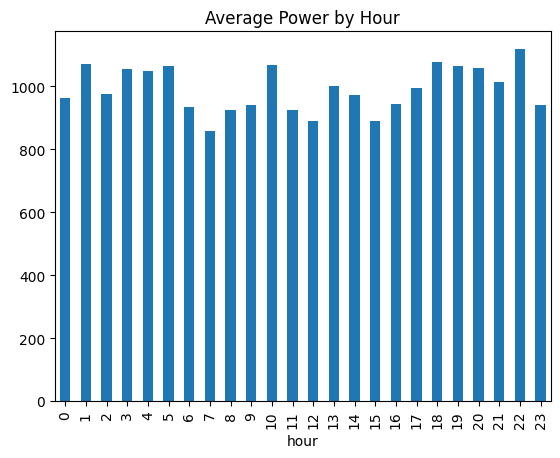

In [14]:
df['hour'] = df.index.hour

df.groupby('hour')['total_power'].mean().plot(
    kind='bar', title="Average Power by Hour"
)


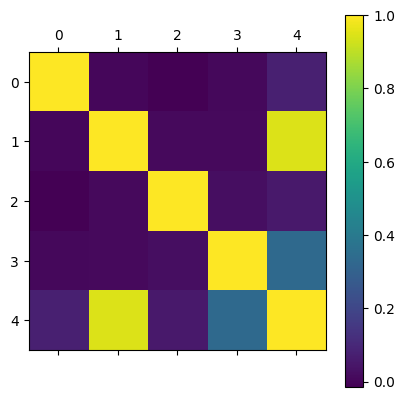

In [15]:
corr = df[['fridge','ac','lights','microwave','total_power']].corr()

import matplotlib.pyplot as plt
plt.matshow(corr)
plt.colorbar()
plt.show()


In [16]:
import pandas as pd

df = pd.read_csv("data/raw/energy_data.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')


In [17]:
appliances = ['fridge','ac','lights','microwave']

mean_vals = df[appliances].mean()
std_vals  = df[appliances].std()

print("Mean Power (Watts):")
print(mean_vals)

print("\nStandard Deviation (Watts):")
print(std_vals)


Mean Power (Watts):
fridge        88.515193
ac           769.145028
lights        32.046501
microwave    102.201427
dtype: float64

Standard Deviation (Watts):
fridge        68.068938
ac           903.557427
lights        34.334650
microwave    304.664875
dtype: float64


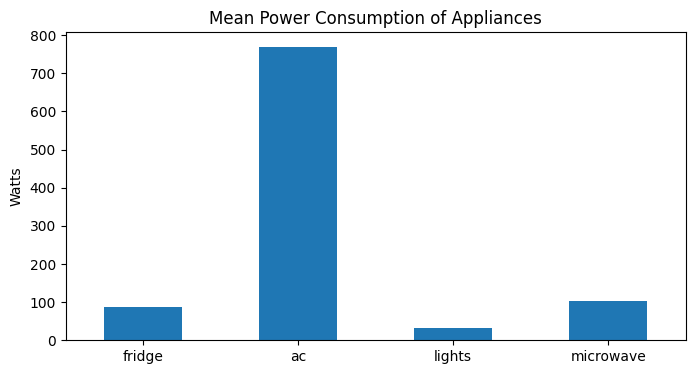

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
mean_vals.plot(kind='bar')
plt.title("Mean Power Consumption of Appliances")
plt.ylabel("Watts")
plt.xticks(rotation=0)
plt.show()


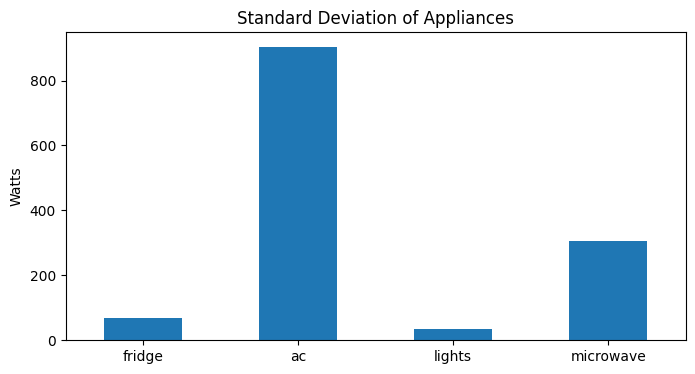

In [19]:
plt.figure(figsize=(8,4))
std_vals.plot(kind='bar')
plt.title("Standard Deviation of Appliances")
plt.ylabel("Watts")
plt.xticks(rotation=0)
plt.show()


In [20]:
appliances = ['fridge','ac','lights','microwave']

stats = df[appliances].agg(['mean','std']).T
print(stats)


                 mean         std
fridge      88.515193   68.068938
ac         769.145028  903.557427
lights      32.046501   34.334650
microwave  102.201427  304.664875


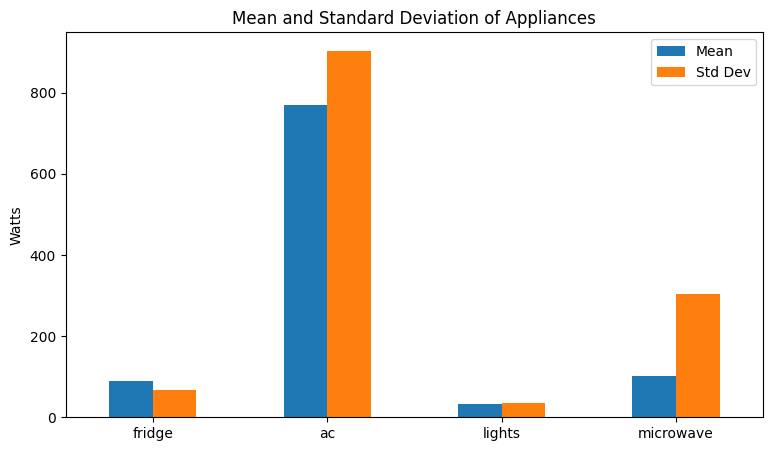

In [24]:
import matplotlib.pyplot as plt

stats.plot(kind='bar', figsize=(9,5))
plt.title("Mean and Standard Deviation of Appliances")
plt.ylabel("Watts")
plt.xticks(rotation=0)
plt.legend(['Mean','Std Dev'])
plt.show()


In [26]:
df_min = df.resample('min').mean()
df_min.head()

,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-01 00:00:00,128.0,0.0,80.0,907.0,1115.0
2023-01-01 00:01:00,NaN,NaN,NaN,NaN,NaN
2023-01-01 00:02:00,NaN,NaN,NaN,NaN,NaN
2023-01-01 00:03:00,NaN,NaN,NaN,NaN,NaN
2023-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN


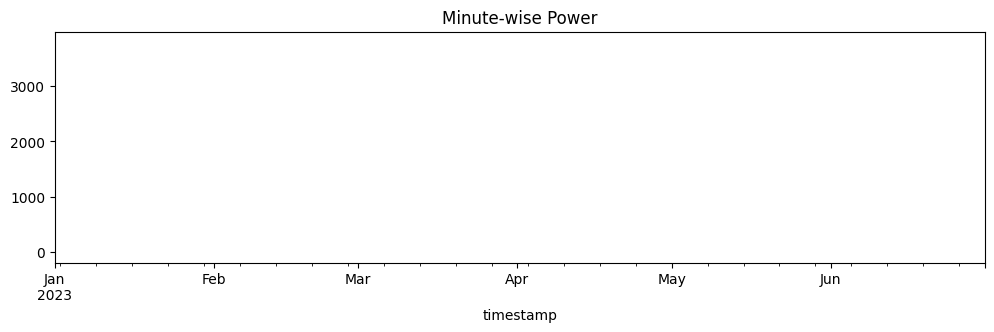

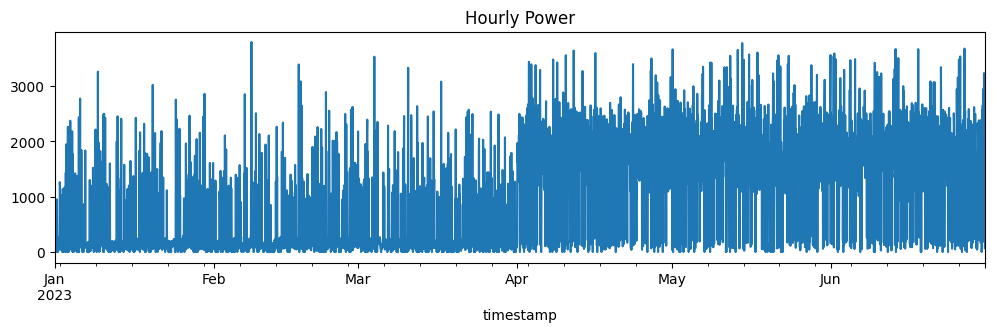

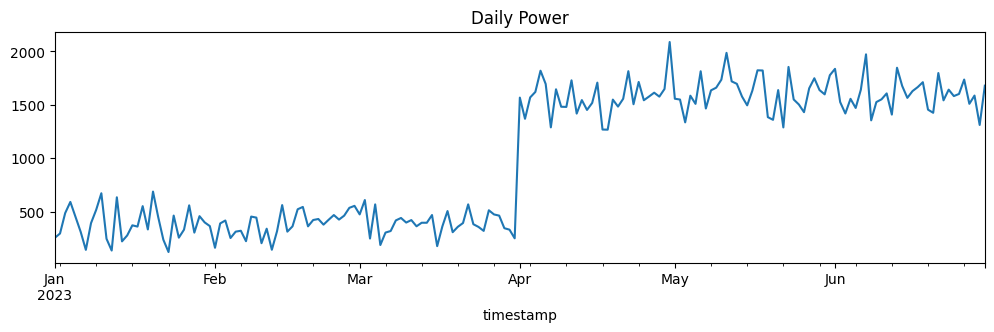

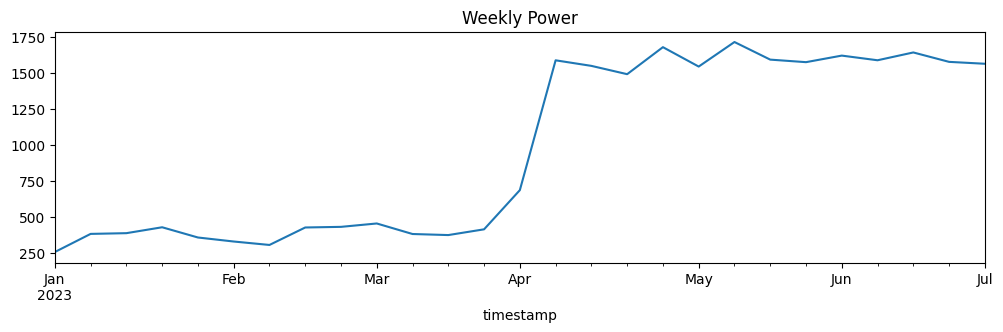

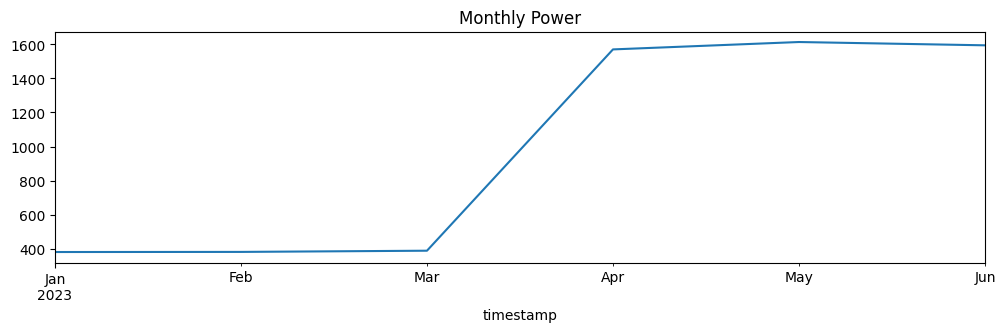

In [27]:
# Minute-wise
df_min = df.resample('min').mean()
df_min['total_power'].plot(figsize=(12,3), title="Minute-wise Power")
plt.show()


# Hourly
df_hour = df.resample('h').mean()
df_hour['total_power'].plot(figsize=(12,3), title="Hourly Power")
plt.show()


# Daily
df_day = df.resample('D').mean()
df_day['total_power'].plot(figsize=(12,3), title="Daily Power")
plt.show()


# Weekly
df_week = df.resample('W').mean()
df_week['total_power'].plot(figsize=(12,3), title="Weekly Power")
plt.show()


# Monthly (End)
df_month = df.resample('ME').mean()
df_month['total_power'].plot(figsize=(12,3), title="Monthly Power")
plt.show()


In [28]:
df_month = df.resample('ME').mean()
df_month


,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-31,91.473118,172.100806,31.665323,86.728495,381.967742
2023-02-28,87.723214,155.168155,32.318452,107.431548,382.641369
2023-03-31,88.732527,163.295699,31.603495,106.032258,389.663978
2023-04-30,83.694444,1358.022222,32.909722,95.051389,1569.677778
2023-05-31,87.385753,1379.237903,31.641129,114.693548,1612.958333
2023-06-30,91.961111,1365.873611,32.200000,103.591667,1593.626389


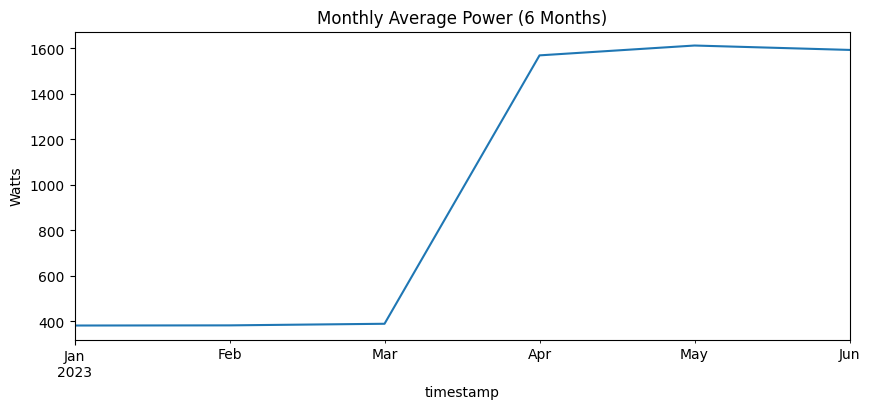

In [29]:
df_month['total_power'].plot(
    figsize=(10,4),
    title="Monthly Average Power (6 Months)"
)
plt.ylabel("Watts")
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/raw/energy_data.csv")

df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')
df['month'] = df.index.month
df['month_name'] = df.index.strftime('%B')



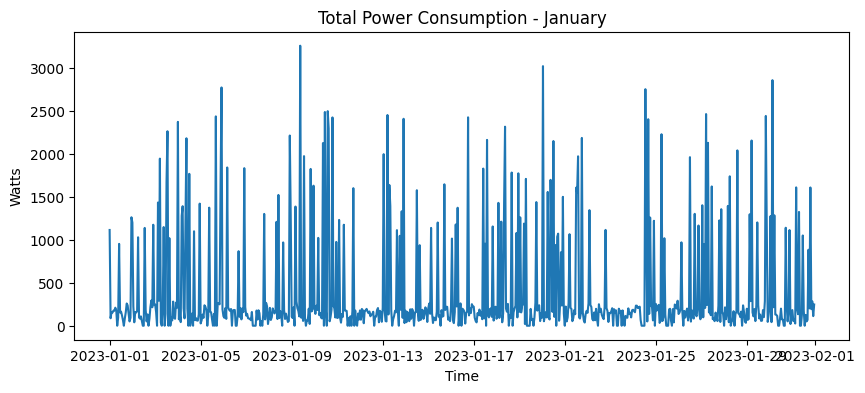

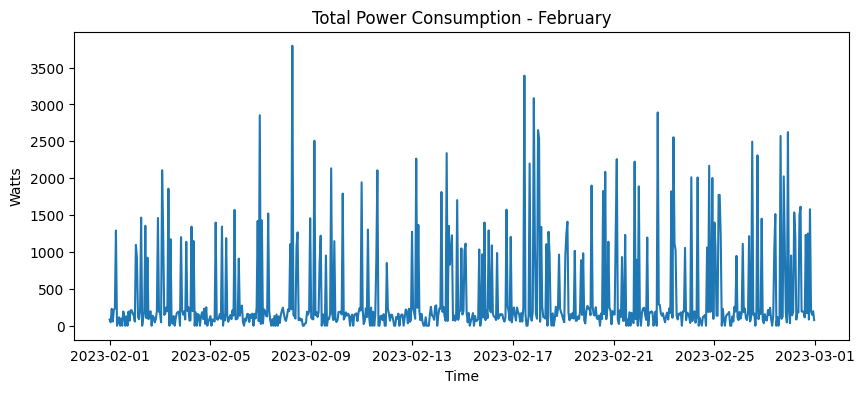

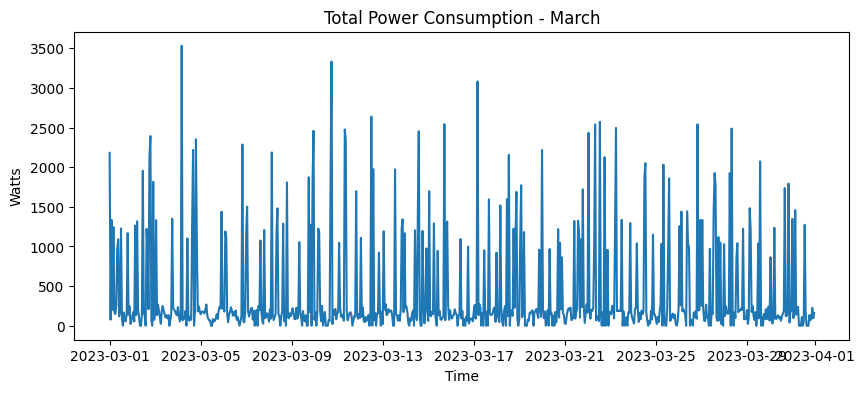

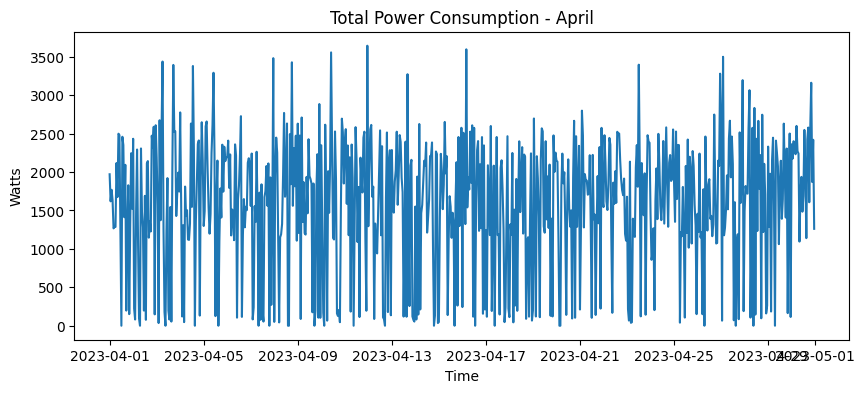

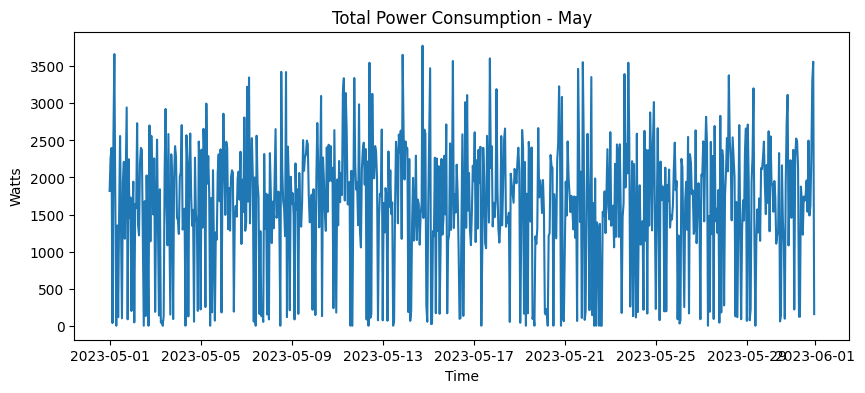

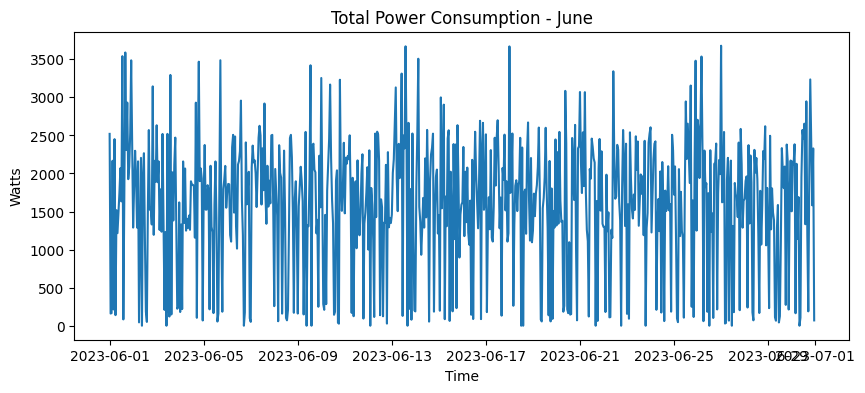

In [3]:
months = df['month_name'].unique()

for m in months:
    month_data = df[df['month_name'] == m]

    plt.figure(figsize=(10,4))
    plt.plot(month_data.index, month_data['total_power'])
    
    plt.title(f"Total Power Consumption - {m}")
    plt.ylabel("Watts")
    plt.xlabel("Time")
    
    plt.show()


In [4]:
monthly_stats = df.groupby('month_name')['total_power'].agg(['mean','max','min','std'])

monthly_stats


,mean,max,min,std
month_name,,,,
April,1569.677778,3644,0,856.674511
February,382.641369,3797,0,604.724241
January,381.967742,3261,0,602.968568
June,1593.626389,3678,0,860.762262
March,389.663978,3532,0,605.941049
May,1612.958333,3778,0,881.897642


In [30]:
df_2month = df.resample('2MS').mean()
df_2month


,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-01,89.693503,164.064972,31.975282,96.553672,382.287429
2023-03-01,86.254781,750.866120,32.245902,100.631831,969.998634
2023-05-01,89.635929,1372.665301,31.915984,109.233607,1603.450820


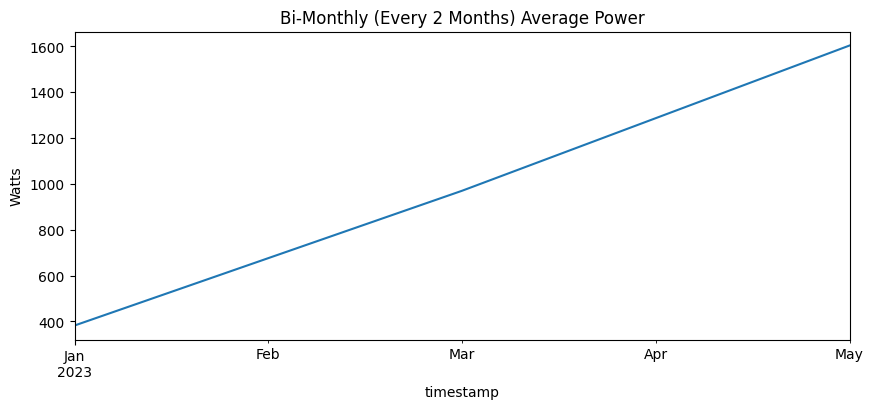

In [31]:
df_2month['total_power'].plot(
    figsize=(10,4),
    title="Bi-Monthly (Every 2 Months) Average Power"
)
plt.ylabel("Watts")
plt.show()


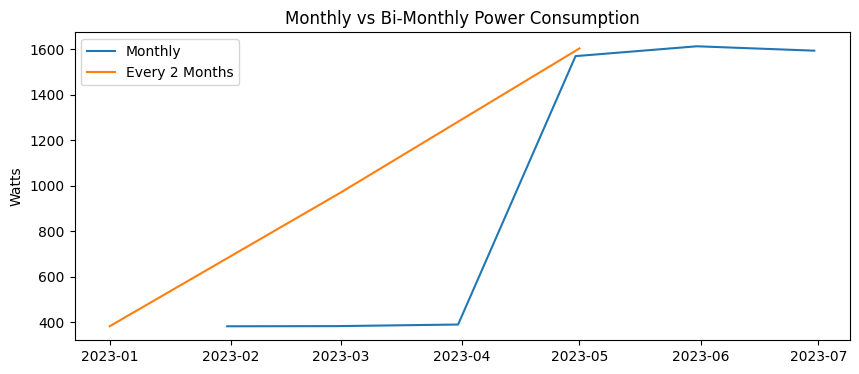

In [32]:
plt.figure(figsize=(10,4))

plt.plot(df_month.index, df_month['total_power'], label="Monthly")
plt.plot(df_2month.index, df_2month['total_power'], label="Every 2 Months")

plt.title("Monthly vs Bi-Monthly Power Consumption")
plt.ylabel("Watts")
plt.legend()
plt.show()
